<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/WPO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [5]:
X = np.arange(0, 2 * math.pi, 0.6)  # 1D input data.
print(X)

[0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4 6. ]


In [6]:
# Target function is noisy sin.
y = np.array([0.00397266, 0.82571249, 1.22602143, 0.37032411, 0.80830592,
              -0.47145041, -0.0794745, -1.07524408, -1.11964221, -0.92272732,
              0.21028977])
# Scale network input data.
scaler = preprocessing.StandardScaler().fit(X.reshape(-1, 1))
Xn = scaler.transform(X.reshape(-1, 1))
print(Xn)

[[-1.58113883]
 [-1.26491106]
 [-0.9486833 ]
 [-0.63245553]
 [-0.31622777]
 [ 0.        ]
 [ 0.31622777]
 [ 0.63245553]
 [ 0.9486833 ]
 [ 1.26491106]
 [ 1.58113883]]


In [7]:
# Create test set.
Xtest = np.arange(0, 2 * math.pi, 0.01)
ytest = np.sin(Xtest)
Xtn = scaler.transform(Xtest.reshape(-1, 1))  #apply scaling to test data

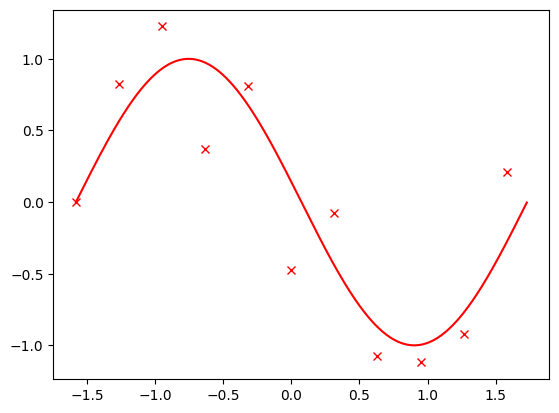

In [11]:
# Plot data.
plt.figure()
plt.plot(Xtn, np.sin(Xtest), 'r')
plt.plot(Xn, y, 'rx')

First, train a network with no hidden layer (hidden_layer_sizes = ()). This is a simple perceptron model. Note that with a linear output function the neural network now represents a simple linear function (
X
T
W
 ) as we tried in WPO1. Score the network on the test set and plot the outputs on the test set. Try the same for a large network (e.g. 50 hidden units)

In [12]:
from sklearn.neural_network import MLPRegressor as mlp  # Import MLP.

In [13]:
net = mlp(hidden_layer_sizes=(), activation='tanh', solver='lbfgs', max_iter=2000)
net.fit(Xn, y)
predictions = net.predict(Xtn)

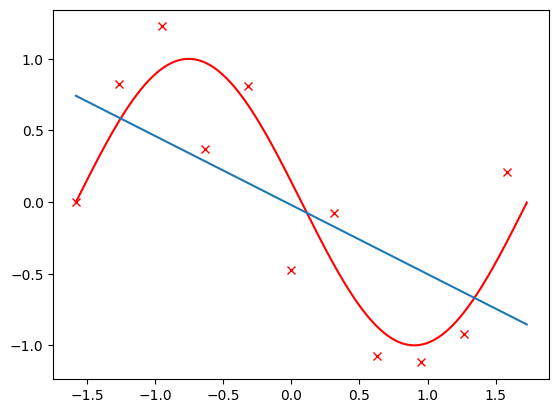

In [14]:
plt.figure()
plt.plot(Xn, y, 'rx')  # Plot training data.
plt.plot(Xtn, ytest, 'r')  # Plot target function.
plt.plot(Xtn, predictions)  # Plot learnt function.

Now try different hidden layers with sizes in 1-20. For each setting, score the network on the test set and plot the result. Try plotting the output function on the test set for networks with 1,2,10 and 50 hidden units. What are the results? Use activation='tanh', solver='lbfgs' as parameters.

In [15]:
# Hidden units to try.
numhidden = [1, 2, 5, 10, 15, 20]

# Results on test set / training set.
restest = np.zeros(len(numhidden))
restrain = np.zeros(len(numhidden))

# Ideally you would run this multiple times and report average results (or use cross-validation, see later).
for idx, hidden in enumerate(numhidden):
    net = mlp(hidden_layer_sizes=(hidden,), activation='tanh', solver='lbfgs', max_iter=2000)
    net.fit(Xn, y)
    restest[idx] += net.score(Xtn, ytest)
    restrain[idx] += net.score(Xn, y)

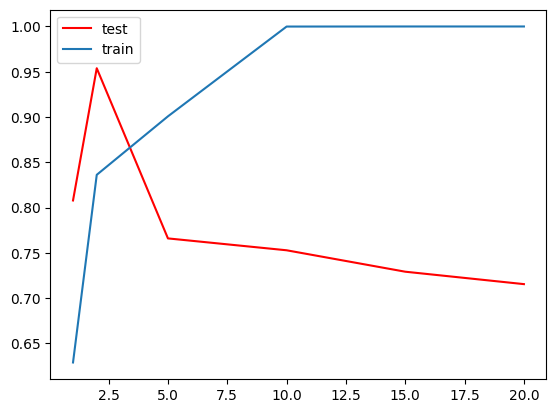

In [16]:
# Plot performance.
plt.figure()
plt.plot(numhidden, restest, 'r', label='test')
plt.plot(numhidden, restrain, label='train')
plt.legend()
plt.show()

Train an MLP model with 40 hidden units, using  
λ
  of 0,0.0001,0.001,0.01,0.1,1 and 10. Plot the performance on the test data, as well as the output function.

In [17]:
decays = [0, 0.0001, 0.001, 0.01, 0.1]  #,1,10]
restest = np.zeros(len(decays))
restrain = np.zeros(len(decays))

for idx, decay in enumerate(decays):
    net = mlp(hidden_layer_sizes=(40,), activation='tanh', alpha=decay, solver='lbfgs', max_iter=2000)
    net.fit(Xn, y)
    restest[idx] += net.score(Xtn, ytest)
    restrain[idx] += net.score(Xn, y)

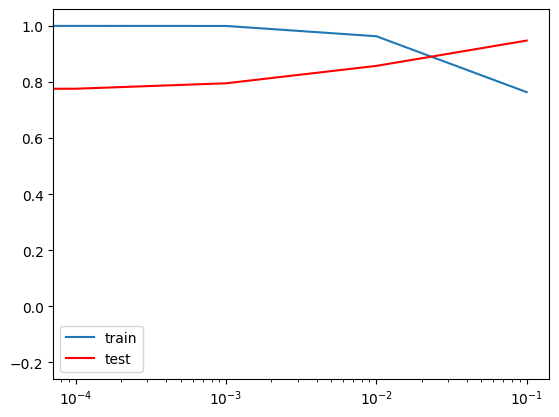

In [18]:
# Plot performance.
plt.figure()
plt.plot(decays, restrain, label='train')
plt.plot(decays, restest, 'r', label='test')
plt.xscale('log')
plt.legend()
plt.show()

Now, try to look for a good combination of number of nodes in the hidden layer and decay parameter.

In [19]:
net = mlp(hidden_layer_sizes=(100,), activation='tanh', alpha=0.05, solver='lbfgs', max_iter=2000)
net.fit(Xn, y)
predictions = net.predict(Xtn)

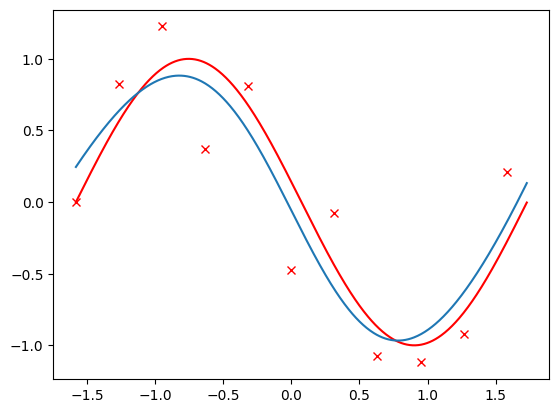

In [20]:
plt.figure()
plt.plot(Xn, y, 'rx')  # Plot training data.
plt.plot(Xtn, ytest, 'r')  # Plot target function.
plt.plot(Xtn, predictions)  # Plot learnt function.